In [8]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz
import itertools as it
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing

In [12]:
df = pd.read_csv('EpcProject2.csv')
#Get rid of hexidecimals
df = df.apply(lambda x: [int(i, 16) for i in x] if x.name in '1236' else x)
df.replace({'A':10, 'B':11, 'C':12, 'D':13, 'E':14, 'F':15, 'G':16}, inplace=True)

df['Checkers'] = df['1'] + df['2'] + df['3'] + df['4'] + df['5'] + df['6']


df_high = df.loc[df['Description']=='High']
df_med = df.loc[df['Description']=='Medium']
df_low = df.loc[df['Description']=='Low']
df_rol = df.loc[df['Description']=='Rollish']


df['Men off']= df['Men off'].astype(int)
df['Odd']= (df['Checkers']%2==1).astype(int)
df['CG'] = (df['PC']/df['Checkers'] - df['Odd']/2)
df['CG_N']= (df['CG']/df['CG'].max())*2
df['gap1']= (df['1']==0).astype(int)
df['gap2']= (df['2']==0).astype(int)
df['gap3']= (df['3']==0).astype(int)
df['gap4']= (df['4']==0).astype(int)
df['gap5']= (df['5']==0).astype(int)
df['gap6']= (df['6']==0).astype(int)

df['tower1'] = (df['1'] >= 5).astype(int)
df['tower2'] = (df['2'] >= 5).astype(int)
df['tower3'] = (df['3'] >= 5).astype(int)
df['tower4'] = (df['4'] >= 5).astype(int)
df['tower5'] = (df['5'] >= 5).astype(int)
df['tower6'] = (df['6'] >= 5).astype(int)
df['towers'] = df['tower1'] + df['tower2'] + df['tower3'] + df['tower4'] + df['tower5'] + df['tower6']

df['acedeuce'] = (df['1']+df['2'])
df['highlow'] = df[['6', '5', '4', '3', '2', '1']].max(axis=1) - df[['6', '5', '4', '3', '2', '1']].min(axis=1)

In [10]:
X = df[['acedeuce', 'CG', '3','6']]
y = df["Description"]
y.shape

(12309,)

In [13]:
#Set up decision tree
# #X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
varianceTree = DecisionTreeClassifier(criterion="gini", max_depth=3)
varianceTree 
varianceTree.fit(X, y)
#Prediction
predTree = varianceTree.predict(X)
varianceTree.feature_importances_

array([0.54141186, 0.45858814, 0.        , 0.        ])

In [14]:
# df["predicted"] = predTree
# incorrect = df[df["Description"] != df["predicted"]]

my_matrix = metrics.confusion_matrix(y, predTree)
print(my_matrix)
#H,L,M,R
#True on y-axis

[[ 963    1  527    3]
 [   0 2287  547  498]
 [ 299  628 4484  165]
 [   0  379   94 1434]]


In [15]:
#Evaluation
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y, predTree))
print('Balanced Accuracy score:',metrics.balanced_accuracy_score(y,predTree))
#Accuracy w/ depth 4 = 0.749
#Accuracy w/ depth 5 = 0.7811


DecisionTrees's Accuracy:  0.7448208627833293
Balanced Accuracy score: 0.7217699977930789


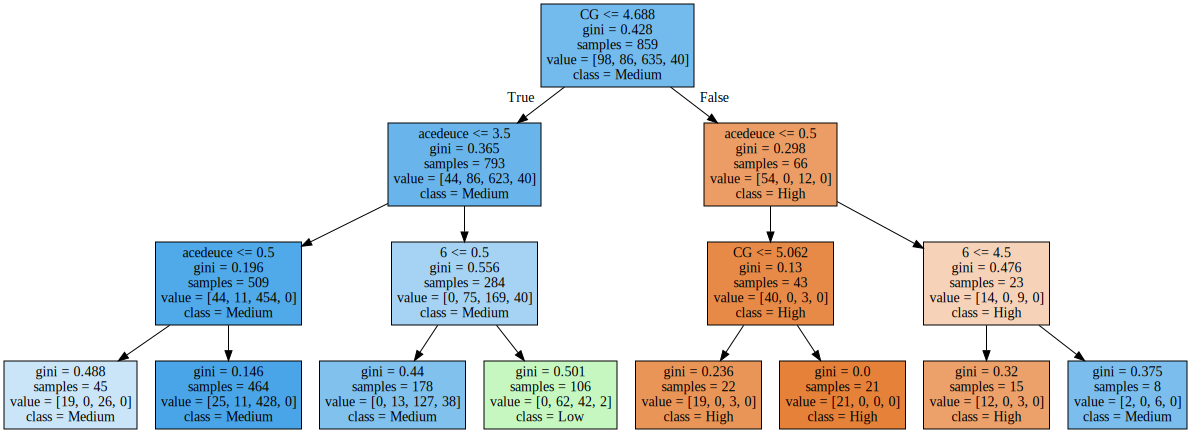

In [64]:
#Visualization
# DOT data
featureNames = X.columns
dot_data = tree.export_graphviz(varianceTree, out_file=None,
                                feature_names=featureNames,
                                class_names=np.unique(y),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
#graph.render("decision_tree4")
graph

In [36]:
df["predicted"] = predTree
incorrect = df[df["Description"] != df["predicted"]]

my_matrix = metrics.confusion_matrix(y, predTree)
my_matrix
#H,L,M,R
#True on y-axis

array([[ 355,    0,  268,    0],
       [   0,  351,  265,   92],
       [  47,  158, 2479,   79],
       [   0,   12,  207,  352]], dtype=int64)

In [4]:
def brute_force(df, params, param_count, depth, y):
    leader = (0, ())
    varianceTree = DecisionTreeClassifier(criterion="gini", max_depth=depth)
    combinations = it.combinations(params, param_count)
    length = np.math.factorial(len(params))/(np.math.factorial(param_count)*np.math.factorial(len(params)-param_count))
    count = 0
    # print(length)
    for combo in combinations:
        count += 1
        # if count % np.math.floor(length/100) == 0:
        #     print('percent checked:',np.round(count/length*100),'%')
        current_params = []
        for i in range(param_count):
            current_params.append(combo[i])
        X = df[current_params]
        varianceTree.fit(X, y)
        predTree = varianceTree.predict(X)
        bal_acc = (metrics.accuracy_score(y,predTree), current_params)
        if bal_acc > leader:
            leader = bal_acc
            # print(leader)
    return leader

params = [
'CG',
'Odd',
'gap1',
'gap2',
'gap3',
'gap4',
'gap5',
'gap6',
'tower1',
'tower2',
'tower3',
'tower4',
'tower5',
'tower6',
'towers',
'acedeuce',
'highlow', 
'Checkers',
'1',
'2',
'3',
'4',
'5',
'6', 
'PC',
'Men off']

y = df['Description']

"""
For df being 4 through 10 and on HMLR with gini
    WITH CG
    - L = [brute_force(df, params, 4, 4, .8, y), brute_force(df, params, 4, 4, 1, y), brute_force(df, params, 4, 4, .6, y), brute_force(df, params, 5, 4, .8, y), brute_force(df, params, 5, 4, 1, y), brute_force(df, params, 5, 4, .6, y)]

    - >[(0.77513397642015, ['CG', 'acedeuce', '1', '3']), (0.772561629153269, ['CG', 'acedeuce', '1', '3']), (0.77513397642015, ['CG', 'acedeuce', '1', '3']), (0.780064308681672, ['CG', 'acedeuce', '1', '2', '3']), (0.7787781350482315, ['CG', 'acedeuce', 'highlow', 'Checkers', '3']), (0.780064308681672, ['CG', 'acedeuce', '1', '2', '3'])]



    WITH NO CG
    - L = [brute_force(df, params, 4, 4, .8, y), brute_force(df, params, 4, 4, 1, y), brute_force(df, params, 4, 4, .6, y), brute_force(df, params, 5, 4, .8, y), brute_force(df, params, 5, 4, 1, y), brute_force(df, params, 5, 4, .6, y)]

    -> [(0.7558413719185423, ['Odd', 'acedeuce', '1', '6']), (0.7581993569131833, ['Odd', 'acedeuce', '3', '6']), (0.7554126473740622, ['Odd', 'acedeuce', '5', '6']), (0.7633440514469454, ['Odd', 'acedeuce', '1', '5', '6']), (0.7729903536977492, ['Odd', 'acedeuce', '1', '3', '6']), (0.7657020364415863, ['Odd', '1', '2', '3', 'PC'])]


    -L = [brute_force(df, params, 4, 5, .8, y), brute_force(df, params, 4, 5, 1, y), brute_force(df, params, 4, 5, .6, y), brute_force(df, params, 5, 5, .8, y), brute_force(df, params, 5, 5, 1, y), brute_force(df, params, 5, 5, .6, y)]

    -> [(0.7732047159699893, ['1', '2', '3', 'PC']), (0.7766345123258307, ['Odd', 'acedeuce', '6', 'PC']), (0.7704180064308682, ['Odd', '1', '2', '6']), (0.7980707395498392, ['Odd', 'acedeuce', '1', '3', '6']), (0.7982851018220793, ['Odd', 'acedeuce', '1', '3', '6']), (0.7980707395498392, ['Odd', 'acedeuce', '1', '3', '6'])]

For df being 4 through 10 and on HLR with gini
    - L =  [brute_force(df, params, 4, 4, .8, y), brute_force(df, params, 4, 4, 1, y), brute_force(df, params, 4, 4, .6, y), brute_force(df, params, 5, 4, .8, y), brute_force(df, params, 5, 4, 1, y), brute_force(df, params, 5, 4, .6, y)]
    -> [(0.9079915878023134, ['CG', 'towers', 'acedeuce', '1']), (0.9079915878023134, ['CG', 'towers', 'acedeuce', '1']), (0.9079915878023134, ['CG', 'towers', 'acedeuce', '1']), (0.9111461619348055, ['CG', 'towers', 'acedeuce', '1', 'PC']), (0.9111461619348055, ['CG', 'towers', 'acedeuce', '1', 'PC']), (0.9111461619348055, ['CG', 'towers', 'acedeuce', '1', 'PC'])]

For df being 4 through 10 on HLR with entropy
    - L = [brute_force(df, params, 4, 3, .8, y), brute_force(df, params, 4, 3, 1, y), brute_force(df, params, 4, 3, .6, y), brute_force(df, params, 5, 3, .8, y), brute_force(df, params, 5, 3, 1, y), brute_force(df, params, 5, 3, .6, y)]
    -> [(0.8664563617245006, ['CG', 'gap4', 'acedeuce', 'Men off']), (0.8664563617245006, ['CG', 'gap4', 'acedeuce', 'Men off']), (0.8664563617245006, ['CG', 'gap4', 'acedeuce', 'Men off']), (0.8664563617245006, ['CG', 'towers', 'acedeuce', 'highlow', 'Men off']), (0.8664563617245006, ['CG', 'towers', 'acedeuce', 'highlow', 'Men off']), (0.8664563617245006, ['CG', 'towers', 'acedeuce', 'highlow', 'Men off'])]
For df being 4 through 10 on HLR with entropy
    - L = [brute_force(df, params, 4, 3, .8, y), brute_force(df, params, 4, 3, 1, y), brute_force(df, params, 4, 3, .6, y), brute_force(df, params, 5, 3, .8, y), brute_force(df, params, 5, 3, 1, y), brute_force(df, params, 5, 3, .6, y)]
    -> [(0.870136698212408, ['CG', 'gap4', 'acedeuce', 'Men off']), (0.870136698212408, ['CG', 'gap4', 'acedeuce', 'Men off']), (0.870136698212408, ['CG', 'gap4', 'acedeuce', 'Men off']), (0.870136698212408, ['CG', 'towers', 'acedeuce', 'highlow', 'Men off']), (0.870136698212408, ['CG', 'towers', 'acedeuce', 'highlow', 'Men off']), (0.870136698212408, ['CG', 'towers', 'acedeuce', 'highlow', 'Men off'])]
"""

brute_force(df, params, 3, 3, y)

KeyboardInterrupt: 

In [19]:
def get_tree(checkers, df_in, max_depth):
    df = df_in.loc[df_in['Checkers'] == checkers]
    y = df['Description']
    model = brute_force(df, params, 4, max_depth, y)
    
    X = df[model[1]]
    varianceTree = DecisionTreeClassifier(criterion='gini', max_depth=max_depth)
    varianceTree.fit(X,y)
    featureNames = X.columns
    dot_data = tree.export_graphviz(varianceTree, out_file=None,
                                    feature_names=featureNames,
                                    class_names=np.unique(y),
                                    filled=True)

    # Draw graph
    graph = graphviz.Source(dot_data, format="png")

    predTree = varianceTree.predict(X)
    score = metrics.accuracy_score(y, predTree)
    print(score)
    return graph

params = [
'CG',
'Odd',
'gap1',
'gap2',
'gap3',
'gap4',
'gap5',
'gap6',
'tower1',
'tower2',
'tower3',
'tower4',
'tower5',
'tower6',
'towers',
'acedeuce',
'highlow', 
'Checkers',
'1',
'2',
'3',
'4',
'5',
'6', 
'PC',
'Men off']


get_tree(6, df, 3)

KeyboardInterrupt: 

0.8630705394190872


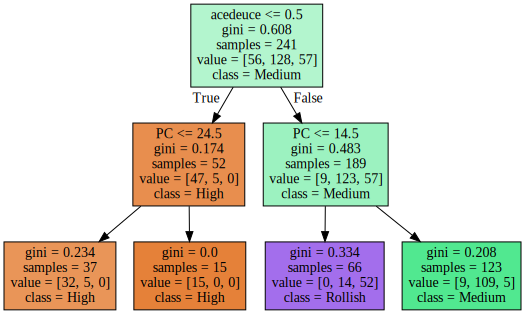

In [17]:
get_tree(5,df,2)

0.8413461538461539


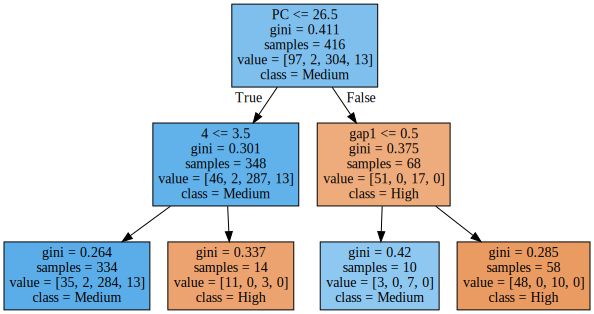

In [104]:
get_tree(6,df,2)

In [20]:
get_tree(7,df,2)

0.7951105937136205


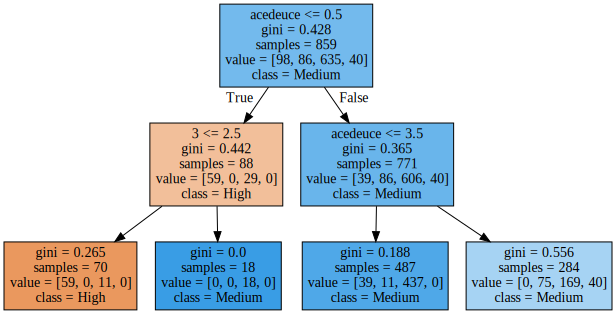

In [106]:
get_tree(8,df,2)

0.7192660550458716


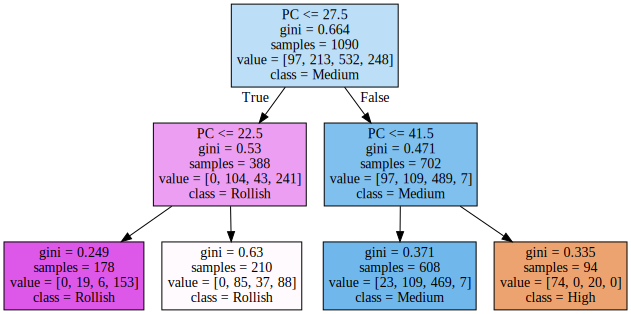

In [107]:
get_tree(9, df,2)

0.7638036809815951


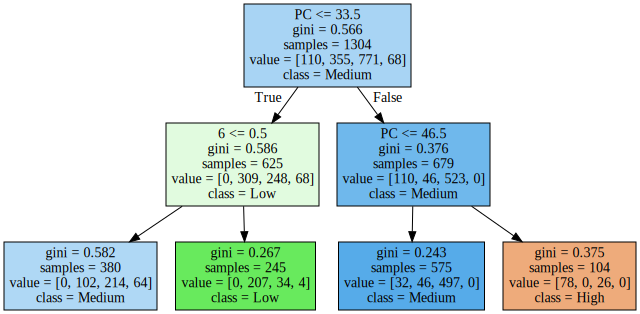

In [108]:
get_tree(10, df, 2)

0.7329192546583851


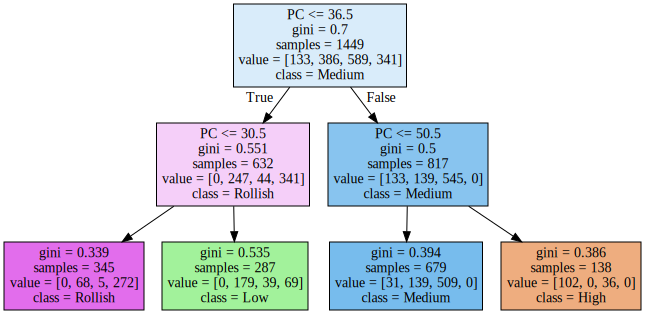

In [109]:
get_tree(11,df, 2)

0.780946208684381


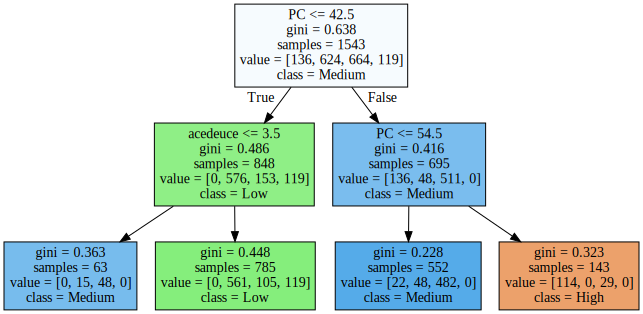

In [110]:
get_tree(12,df, 2)

0.7959582790091264


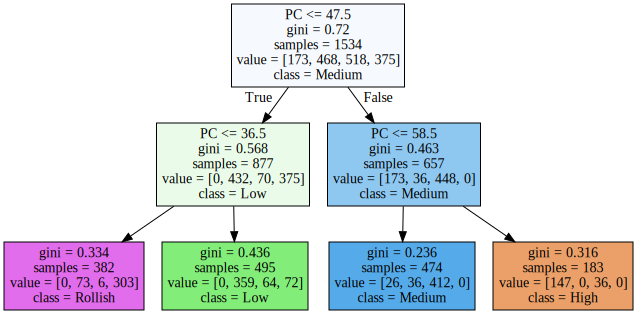

In [111]:
get_tree(13, df, 2)

0.8054862842892768


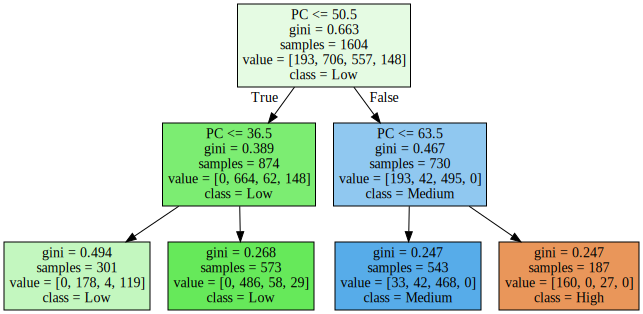

In [112]:
get_tree(14,df,2)

0.8162124388539483


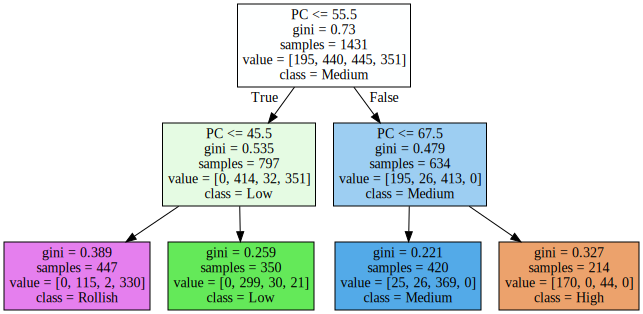

In [113]:
get_tree(15,df,2)

In [114]:
get_tree(16,df,2)

ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required.

In [115]:
get_tree(17,df,2)

ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required.

In [117]:
get_tree(18,df,2)

ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required.